In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df=pd.read_csv('Dataset.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df['TotalCharges'].dtypes

dtype('O')

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
df['TotalCharges'].dtypes

dtype('float64')

In [9]:
categorical_features=[
    'gender',
    'Partner',
    'SeniorCitizen',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod'
]

numerical_features=['tenure', 'MonthlyCharges', 'TotalCharges']
target='Churn'

In [10]:
df.skew(numeric_only=True)

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
dtype: float64

In [11]:
df.corr(numeric_only=True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

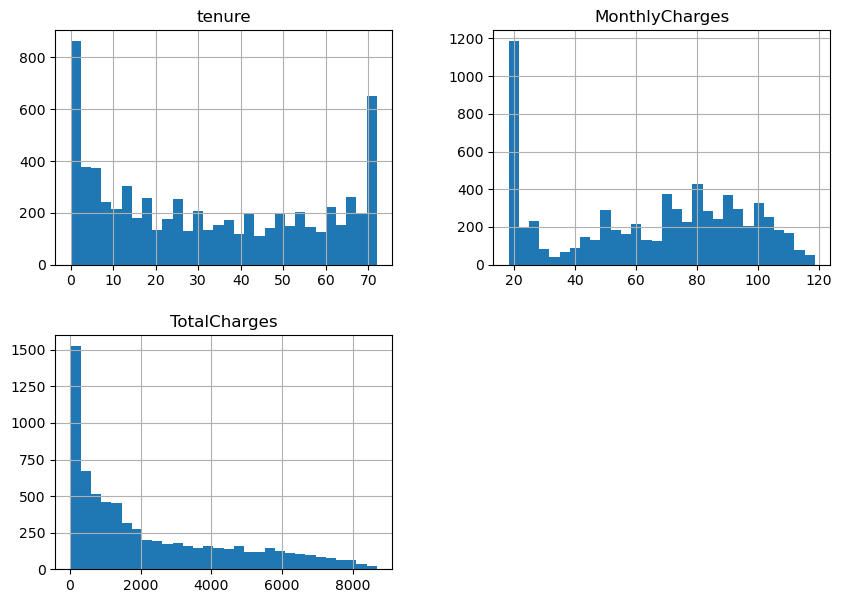

In [12]:
df[numerical_features].hist(bins=30, figsize=(10,7))

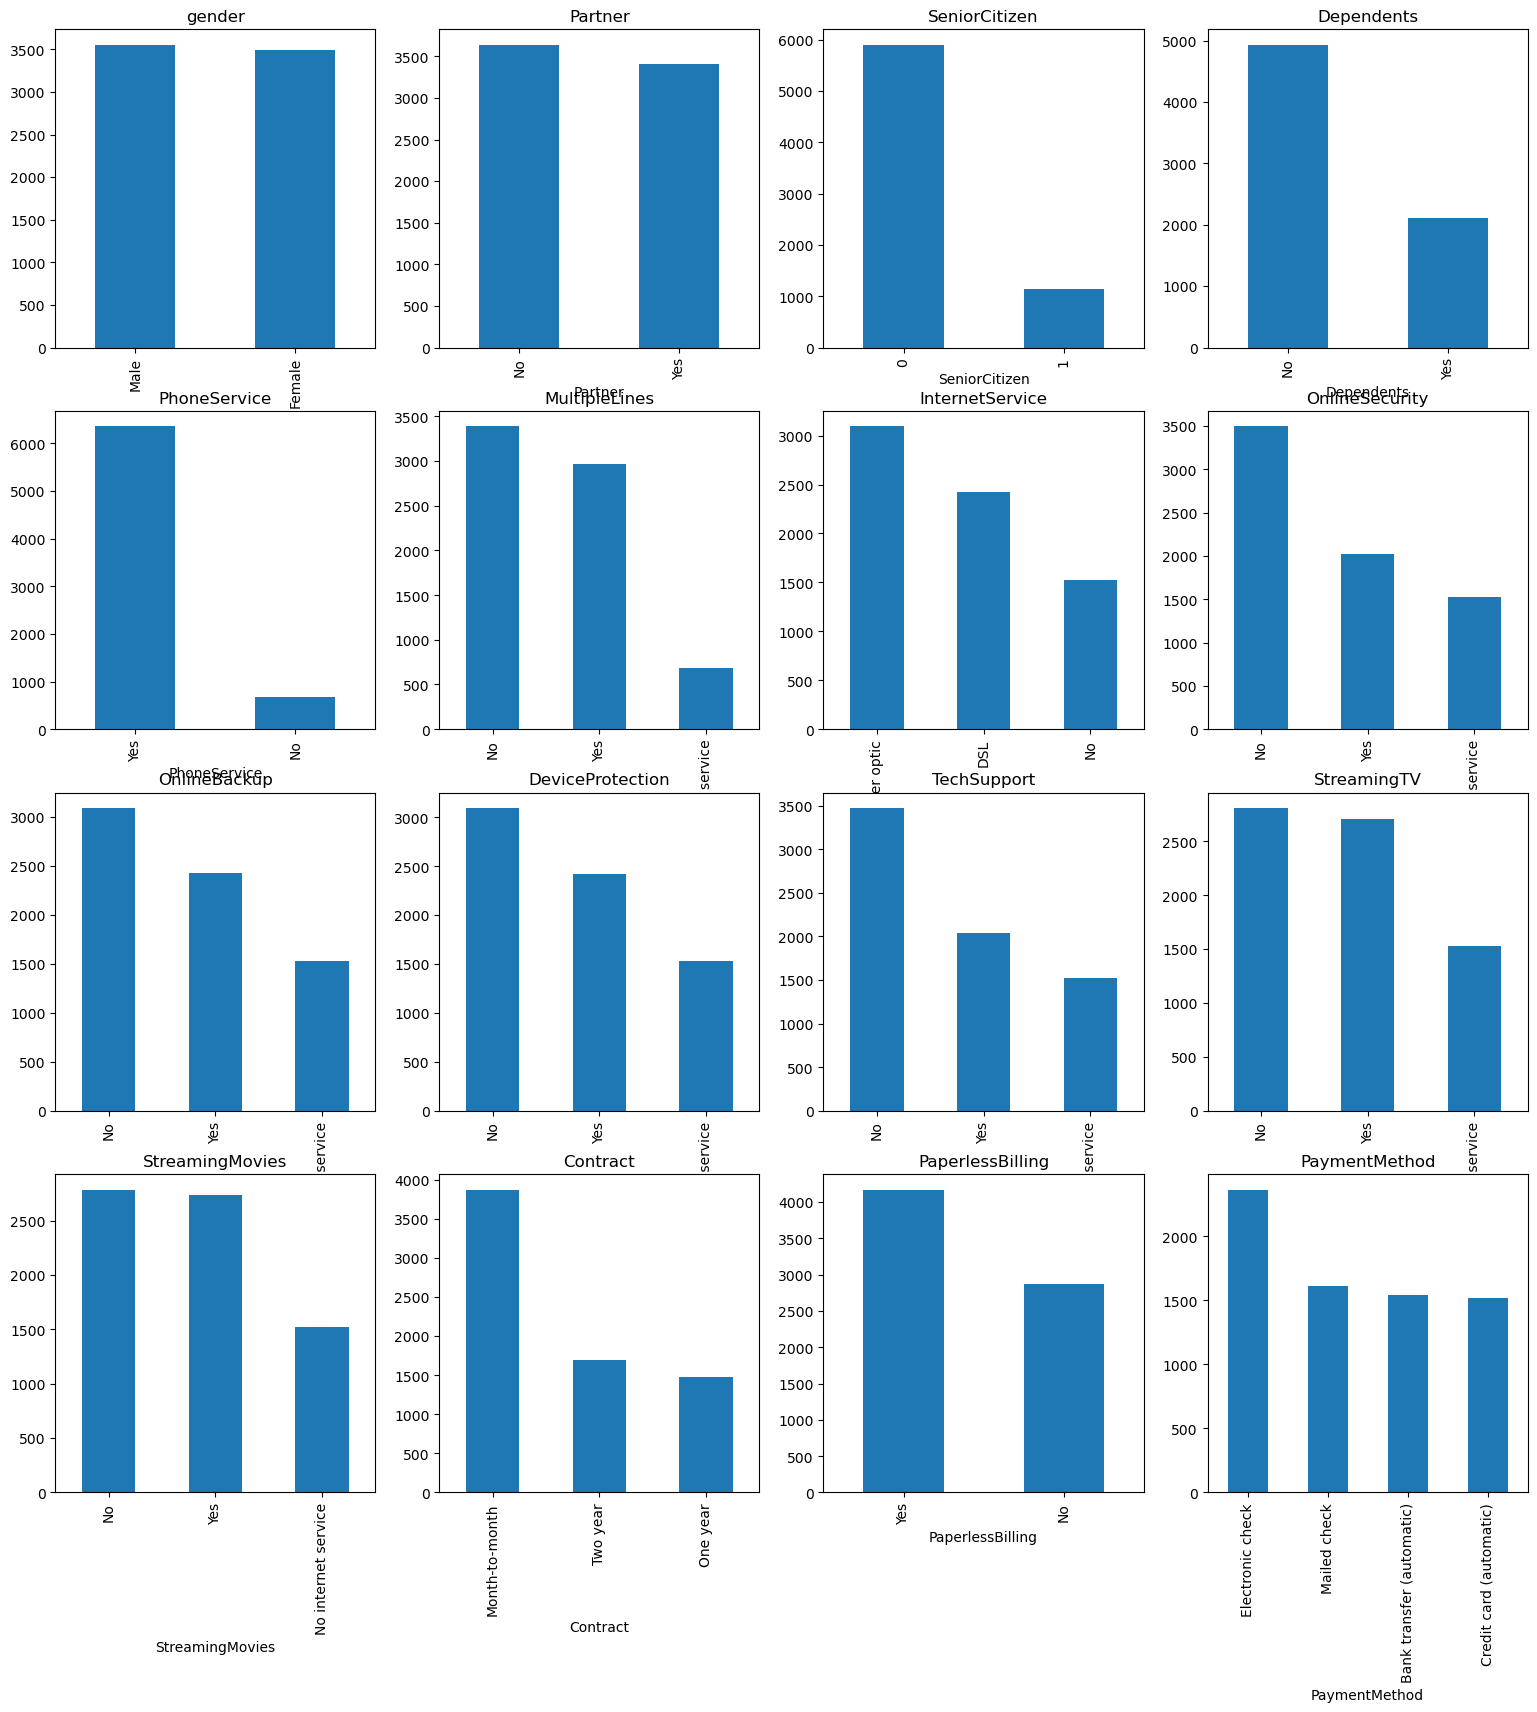

In [13]:
ROWS, COLS = 4,4
fig, ax=plt.subplots(ROWS, COLS, figsize=(19,19))
row, col=0,0
for i, categorical_feature in enumerate(categorical_features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    df[categorical_feature].value_counts().plot(kind='bar', ax=ax[row, col]).set_title(categorical_feature)

Text(0.5, 1.0, 'churned')

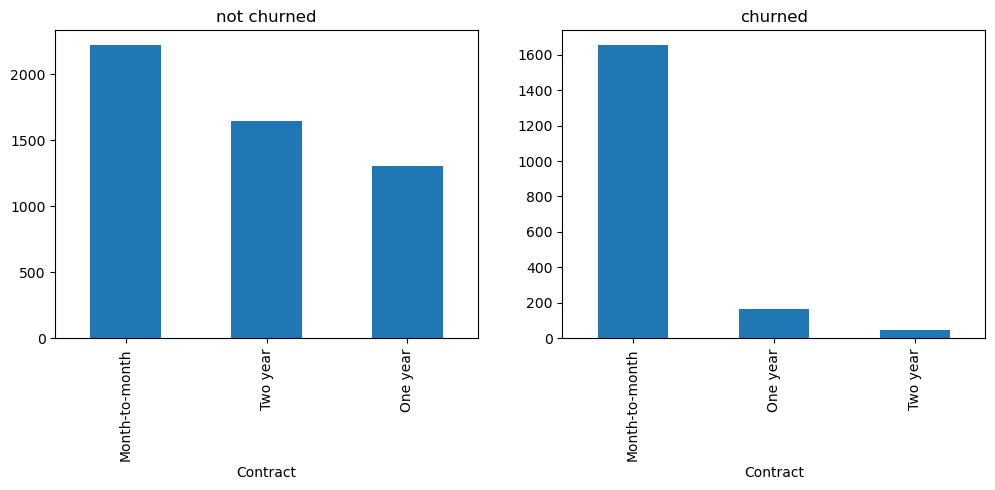

In [14]:
feature='Contract'
fig, ax=plt.subplots(1,2, figsize=(12,4))
df[df.Churn == 'No'][feature].value_counts().plot(kind='bar', ax=ax[0]).set_title('not churned')
df[df.Churn == 'Yes'][feature].value_counts().plot(kind='bar', ax=ax[1]).set_title('churned')

Text(0.5, 1.0, 'churned')

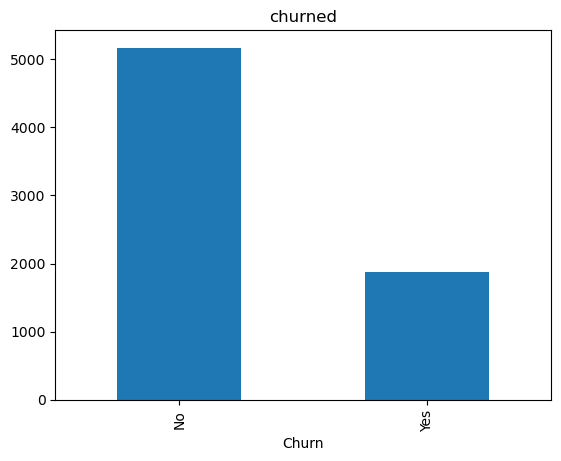

In [15]:
df[target].value_counts().plot(kind='bar').set_title('churned')

## Cleaning and transforming data

In [17]:
df.drop(['customerID'], axis=1, inplace=True)

In [18]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### One Hot Encoding

In [20]:
df1=pd.get_dummies(data=df, columns=['gender','Partner','Dependents',
                                     'PhoneService','MultipleLines','InternetService',
                                     'OnlineSecurity','OnlineBackup','DeviceProtection',
                                     'TechSupport','StreamingTV','StreamingMovies','Contract',
                                     'PaperlessBilling','PaymentMethod', 'Churn'], drop_first=True)

In [21]:
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [22]:
 df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [23]:
df1.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [24]:
df1.shape

(7043, 31)

In [25]:
imputer= SimpleImputer(missing_values=np.nan, strategy='mean')
df1.TotalCharges=imputer.fit_transform(df1['TotalCharges'].values.reshape(-1, 1))

#### Feature scaling

In [27]:
scaler=StandardScaler()

In [28]:
scaler.fit(df1.drop(['Churn_Yes'], axis=1))
scaled_features = scaler.transform(df1.drop('Churn_Yes', axis=1))

#### Feature selection

In [30]:
X=scaled_features
y=df1['Churn_Yes']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.1, random_state=44)

## Prediction Using Logistic Regression

In [32]:
logmodel=LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [33]:
predLR=logmodel.predict(X_test)
print(classification_report(y_test, predLR))

              precision    recall  f1-score   support

       False       0.83      0.90      0.86       512
        True       0.66      0.50      0.57       193

    accuracy                           0.79       705
   macro avg       0.74      0.70      0.72       705
weighted avg       0.78      0.79      0.78       705



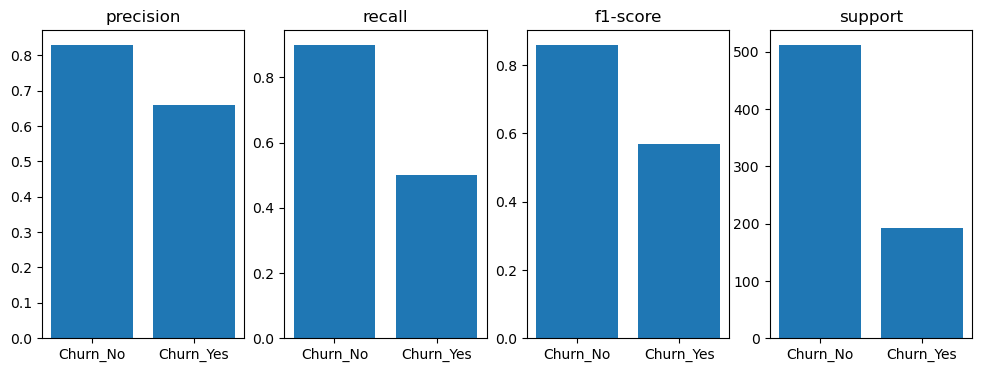

In [34]:
# calculate the classification report
report=classification_report(y_test, predLR, target_names=['Churn_No', 'Churn_Yes'])
#split the report into lines
lines=report.split('\n')
#split each line into parts
parts=[line.split() for line in lines[2:-5]]
# extract the metric for each class
class_metrics=dict()
for part in parts:
    class_metrics[part[0]]={'precision': float(part[1]), 'recall': float(part[2]), 'f1-score': float(part[3]), 'support': int(part[4])}
#create a bar chart for each metric
fig, ax=plt.subplots(1,4,figsize=(12,4))
metrics=['precision', 'recall', 'f1-score', 'support']
for i, metric in enumerate(metrics):
    ax[i].bar(class_metrics.keys(), [class_metrics[key][metric] for key in class_metrics.keys()])
    ax[i].set_title(metric)

#display the plot
plt.show()

In [35]:
confusion_matrix_LR=confusion_matrix(y_test, predLR)

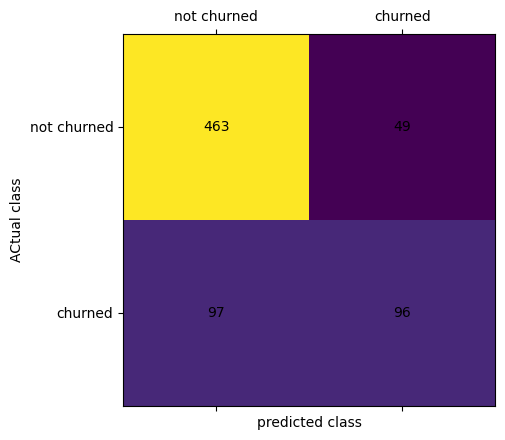

In [36]:
# create a heatmap of the matrix using matshow()
plt.matshow(confusion_matrix(y_test, predLR))
#add labels for x and y axes
plt.xlabel('predicted class')
plt.ylabel('ACtual class')

for i in range(2):
    for j in range(2):
        plt.text(j,i, confusion_matrix_LR[i,j], ha='center', va='center')

#add custom labels for x and y ticks
plt.xticks([0,1], ['not churned', 'churned'])
plt.yticks([0,1], ['not churned', 'churned'])
plt.show()

In [37]:
logmodel.score(X_train, y_train)


0.8076680340801514

In [38]:
accuracy_score(y_test, predLR)

0.7929078014184398

## Prediction using support vector classifier

In [40]:
svc=SVC()
svc.fit(X_train, y_train)
y_pred_svc=svc.predict(X_test)

In [41]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

       False       0.82      0.92      0.87       512
        True       0.69      0.46      0.55       193

    accuracy                           0.80       705
   macro avg       0.76      0.69      0.71       705
weighted avg       0.78      0.80      0.78       705



In [42]:
confusion_matrix_svc=confusion_matrix(y_test, y_pred_svc)

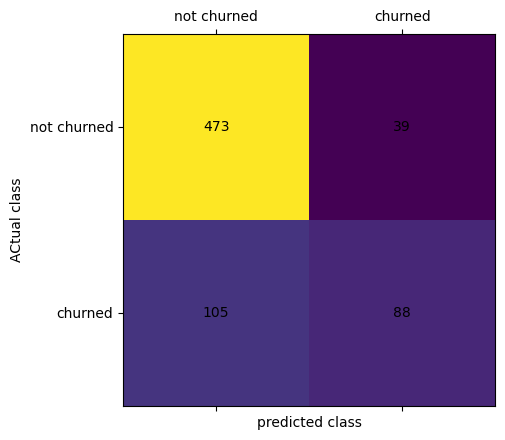

In [43]:
# create a heatmap of the matrix using matshow()
plt.matshow(confusion_matrix(y_test, y_pred_svc))
#add labels for x and y axes
plt.xlabel('predicted class')
plt.ylabel('ACtual class')

for i in range(2):
    for j in range(2):
        plt.text(j,i, confusion_matrix_svc[i,j], ha='center', va='center')

#add custom labels for x and y ticks
plt.xticks([0,1], ['not churned', 'churned'])
plt.yticks([0,1], ['not churned', 'churned'])
plt.show()

In [44]:
svc.score(X_train, y_train)

0.8163458504260019

In [45]:
accuracy_score(y_test, y_pred_svc)

0.7957446808510639

## Prediction using Decision Tree Classifier

In [47]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc=dtc.predict(X_test)

In [48]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

       False       0.79      0.82      0.80       512
        True       0.46      0.41      0.43       193

    accuracy                           0.71       705
   macro avg       0.62      0.61      0.62       705
weighted avg       0.70      0.71      0.70       705



In [49]:
confusion_matrix_dtc=confusion_matrix(y_test, y_pred_dtc)

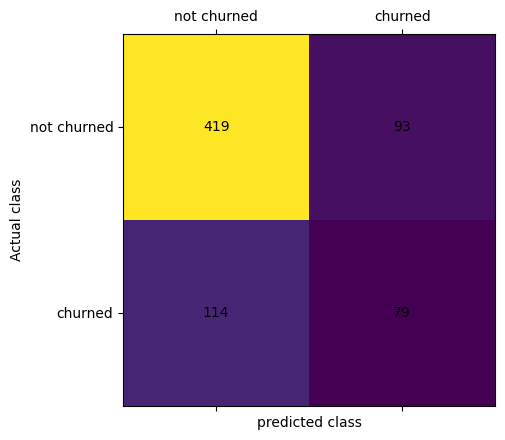

In [50]:
# create a heatmap of the matrix using matshow()
plt.matshow(confusion_matrix(y_test, y_pred_dtc))
#add labels for x and y axes
plt.xlabel('predicted class')
plt.ylabel('Actual class')

for i in range(2):
    for j in range(2):
        plt.text(j,i, confusion_matrix_dtc[i,j], ha='center', va='center')

#add custom labels for x and y ticks
plt.xticks([0,1], ['not churned', 'churned'])
plt.yticks([0,1], ['not churned', 'churned'])
plt.show()

In [51]:
dtc.score(X_train, y_train)

0.9981066582518144

In [52]:
accuracy_score(y_test, y_pred_dtc)

0.7063829787234043

## Prediction using KNN classifier

In [54]:
knn=KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [55]:
pred_knn=knn.predict(X_test)

In [56]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

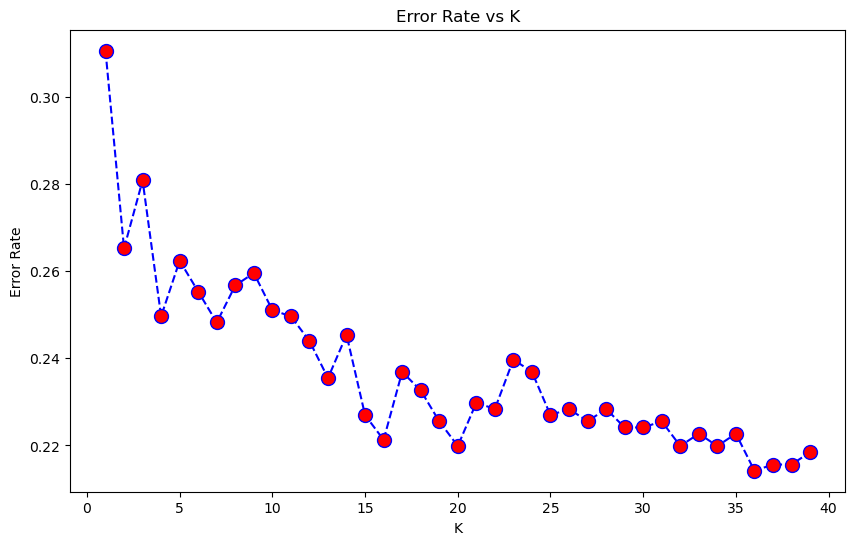

In [58]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle= '--', marker= 'o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [60]:
print(classification_report(y_test, pred_knn ))

              precision    recall  f1-score   support

       False       0.83      0.87      0.85       512
        True       0.60      0.52      0.56       193

    accuracy                           0.78       705
   macro avg       0.72      0.70      0.71       705
weighted avg       0.77      0.78      0.77       705



In [62]:
confusion_matrix_knn=confusion_matrix(y_test, pred_knn)

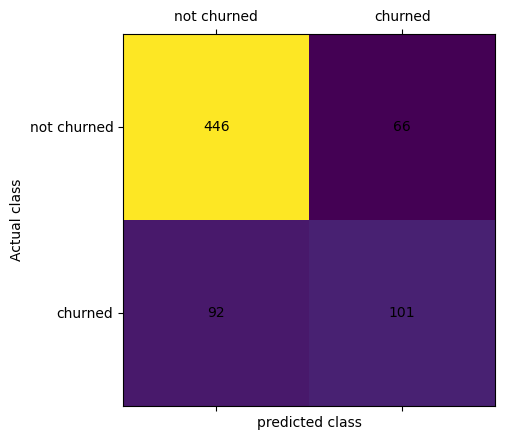

In [64]:
# create a heatmap of the matrix using matshow()
plt.matshow(confusion_matrix_knn)
#add labels for x and y axes
plt.xlabel('predicted class')
plt.ylabel('Actual class')

for i in range(2):
    for j in range(2):
        plt.text(j,i, confusion_matrix_knn[i,j], ha='center', va='center')

#add custom labels for x and y ticks
plt.xticks([0,1], ['not churned', 'churned'])
plt.yticks([0,1], ['not churned', 'churned'])
plt.show()

In [66]:
knn.score(X_train, y_train)

0.7999368886083938

In [70]:
accuracy_score(y_test, pred_knn)

0.775886524822695